In [1]:
import torch

import torchvision as tv

import torchvision.transforms as transforms

import torch.nn as nn

import torch.nn.functional as F

from torch.autograd import Variable

from torchvision.utils import save_image

/usr/lib/python3/dist-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.24.2) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
# Loading and Transforming data

transform = transforms.Compose([transforms.ToTensor(),  transforms.Normalize((0.4914, 0.4822, 0.4466), (0.247,            0.243, 0.261))])

trainTransform  = tv.transforms.Compose([tv.transforms.ToTensor(), tv.transforms.Normalize((0.4914, 0.4822, 0.4466), (0.247, 0.243, 0.261))])

trainset = tv.datasets.CIFAR10(root='./data',  train=True,download=True, transform=transform)

dataloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=False, num_workers=4)

testset = tv.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)



Files already downloaded and verified


# hola aixo es un titol

In [3]:
class Autoencoder(nn.Module):

    def __init__(self):
        super(Autoencoder,self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 6, kernel_size=5),
            nn.ReLU(True),
            nn.Conv2d(6,16,kernel_size=5),
            nn.ReLU(True))

        self.decoder = nn.Sequential(             
            nn.ConvTranspose2d(16,6,kernel_size=5),
            nn.ReLU(True),
            nn.ConvTranspose2d(6,3,kernel_size=5),
            nn.ReLU(True),
            nn.Sigmoid())

    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [4]:
model = Autoencoder().cpu()

distance = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(),weight_decay=1e-5)

In [ ]:
num_epochs = 100
for epoch in range(num_epochs):
    for data in dataloader:
        img, _ = data
        img = Variable(img).cpu()
        # ===================forward=====================
        output = model(img)
        loss = distance(output, img)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch %10 == 0:
            print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, num_epochs, loss.data)))
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, num_epochs, loss.data))

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, num_epochs, loss.data))

epoch [1/100], loss:0.7775


In [13]:
show = model(img).cpu().detach().numpy()

In [14]:
show.shape

(16, 3, 32, 32)

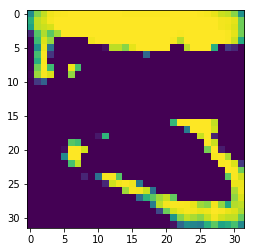

In [18]:
plt.imshow(show[15][0])